In [1]:
%matplotlib notebook
from main import DataLoader
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.patches as mpatches

In [7]:
from main import FileHospitalGeneralData
from main import FileHG_2018
from main import FileHG_2017
from main import FileHG_2016

In [8]:
# Using method Dataloader.LoadFile(), extracting the data from the csv file from S3 bucket.
hg2019_df=DataLoader.LoadFile(FileHospitalGeneralData)
hg2018_df=DataLoader.LoadFile(FileHG_2018)
hg2017_df=DataLoader.LoadFile(FileHG_2017)
hg2016_df=DataLoader.LoadFile(FileHG_2016)

In [36]:
#Extracted the relevant columns into a new dataframe
hg2019_df = pd.DataFrame(hg2019_df)
hg2018_df = pd.DataFrame(hg2018_df)
hg2017_df = pd.DataFrame(hg2017_df)
hg2016_df = pd.DataFrame(hg2016_df)

measures2019 = pd.DataFrame(hg2019_df[['Effectiveness of care national comparison','Timeliness of care national comparison', 'Efficient use of medical imaging national comparison', 'Patient experience national comparison', 'Readmission national comparison']])
measures2018 = pd.DataFrame(hg2018_df[['Effectiveness of care national comparison','Timeliness of care national comparison', 'Efficient use of medical imaging national comparison', 'Patient experience national comparison', 'Readmission national comparison']])
measures2017 = pd.DataFrame(hg2017_df[['Effectiveness of care national comparison','Timeliness of care national comparison', 'Efficient use of medical imaging national comparison', 'Patient experience national comparison', 'Readmission national comparison']])
measures2016 = pd.DataFrame(hg2016_df[['Effectiveness of care national comparison','Timeliness of care national comparison', 'Efficient use of medical imaging national comparison', 'Patient experience national comparison', 'Readmission national comparison']])



print ("Before cleaning", len(measures2019.index), len(measures2018.index), len(measures2017.index), len(measures2016.index))


Before cleaning 5339 4793 4812 4807


In [38]:
# CLEANING OF THE DATASET
#Delete these row indexes from dataFrame
measures2019 = measures2019.loc[(measures2019['Timeliness of care national comparison'] != "Not Available") & 
                          (measures2019['Efficient use of medical imaging national comparison'] != "Not Available") &
                          (measures2019['Effectiveness of care national comparison'] != "Not Available") &
                          (measures2019['Patient experience national comparison'] != "Not Available") &
                          (measures2019['Readmission national comparison'] != "Not Available")] 

measures2018 = measures2018.loc[(measures2018['Timeliness of care national comparison'] != "Not Available") & 
                          (measures2018['Efficient use of medical imaging national comparison'] != "Not Available") &
                          (measures2018['Effectiveness of care national comparison'] != "Not Available") &
                          (measures2018['Patient experience national comparison'] != "Not Available") &
                          (measures2018['Readmission national comparison'] != "Not Available")] 

measures2017 = measures2017.loc[(measures2017['Timeliness of care national comparison'] != "Not Available") & 
                          (measures2017['Efficient use of medical imaging national comparison'] != "Not Available") &
                          (measures2017['Effectiveness of care national comparison'] != "Not Available") &
                          (measures2017['Patient experience national comparison'] != "Not Available") &
                          (measures2017['Readmission national comparison'] != "Not Available")] 

measures2016 = measures2016.loc[(measures2016['Timeliness of care national comparison'] != "Not Available") & 
                          (measures2016['Efficient use of medical imaging national comparison'] != "Not Available") &
                          (measures2016['Effectiveness of care national comparison'] != "Not Available") &
                          (measures2016['Patient experience national comparison'] != "Not Available") &
                          (measures2016['Readmission national comparison'] != "Not Available")] 

print ("After cleaning", len(measures2019.index), len(measures2018.index), len(measures2017.index), len(measures2016.index))

# Renaming the columns in the dataframe to relavant 
pie2019 = measures2019.rename(columns={"Effectiveness of care national comparison": "Effectiveness of care","Timeliness of care national comparison": "Timeliness of care","Efficient use of medical imaging national comparison": "Efficient use of medical imaging","Patient experience national comparison": "Patient experience","Readmission national comparison": "Readmission"})
pie2018 = measures2018.rename(columns={"Effectiveness of care national comparison": "Effectiveness of care","Timeliness of care national comparison": "Timeliness of care","Efficient use of medical imaging national comparison": "Efficient use of medical imaging","Patient experience national comparison": "Patient experience","Readmission national comparison": "Readmission"})
pie2017 = measures2017.rename(columns={"Effectiveness of care national comparison": "Effectiveness of care","Timeliness of care national comparison": "Timeliness of care","Efficient use of medical imaging national comparison": "Efficient use of medical imaging","Patient experience national comparison": "Patient experience","Readmission national comparison": "Readmission"})
pie2016 = measures2016.rename(columns={"Effectiveness of care national comparison": "Effectiveness of care","Timeliness of care national comparison": "Timeliness of care","Efficient use of medical imaging national comparison": "Efficient use of medical imaging","Patient experience national comparison": "Patient experience","Readmission national comparison": "Readmission"})


After cleaning 2603 2669 2576 2596


In [39]:
# Extracting the hospital overall ranking as HospitalRankingdf dataframe
HospitalRating2019 = pd.DataFrame(hg2019_df['Hospital overall rating'])
HospitalRating2019 = HospitalRating2019.loc[(HospitalRating2019['Hospital overall rating'] != "Not Available")]

HospitalRating2018 = pd.DataFrame(hg2018_df['Hospital overall rating'])
HospitalRating2018 = HospitalRating2018.loc[(HospitalRating2018['Hospital overall rating'] != "Not Available")]

HospitalRating2017 = pd.DataFrame(hg2017_df['Hospital overall rating'])
HospitalRating2017 = HospitalRating2017.loc[(HospitalRating2017['Hospital overall rating'] != "Not Available")]

HospitalRating2016 = pd.DataFrame(hg2016_df['Hospital overall rating'])
HospitalRating2016 = HospitalRating2016.loc[(HospitalRating2016['Hospital overall rating'] != "Not Available")]

#Counting the number of Hospitals under each rank
seriesRatings2019 = pd.Series(HospitalRating2019['Hospital overall rating'])
rank1_counts2019 = seriesRatings2019.str.count("1").sum()
rank2_counts2019 = seriesRatings2019.str.count("2").sum()
rank3_counts2019 = seriesRatings2019.str.count("3").sum()
rank4_counts2019 = seriesRatings2019.str.count("4").sum()
rank5_counts2019 = seriesRatings2019.str.count("5").sum()

seriesRatings2018 = pd.Series(HospitalRating2018['Hospital overall rating'])
rank1_counts2018 = seriesRatings2018.str.count("1").sum()
rank2_counts2018 = seriesRatings2018.str.count("2").sum()
rank3_counts2018 = seriesRatings2018.str.count("3").sum()
rank4_counts2018 = seriesRatings2018.str.count("4").sum()
rank5_counts2018 = seriesRatings2018.str.count("5").sum()

seriesRatings2017 = pd.Series(HospitalRating2017['Hospital overall rating'])
rank1_counts2017 = seriesRatings2017.str.count("1").sum()
rank2_counts2017 = seriesRatings2017.str.count("2").sum()
rank3_counts2017 = seriesRatings2017.str.count("3").sum()
rank4_counts2017 = seriesRatings2017.str.count("4").sum()
rank5_counts2017 = seriesRatings2017.str.count("5").sum()

seriesRatings2016 = pd.Series(HospitalRating2016['Hospital overall rating'])
rank1_counts2016 = seriesRatings2016.str.count("1").sum()
rank2_counts2016 = seriesRatings2016.str.count("2").sum()
rank3_counts2016 = seriesRatings2016.str.count("3").sum()
rank4_counts2016 = seriesRatings2016.str.count("4").sum()
rank5_counts2016 = seriesRatings2016.str.count("5").sum()

Ranking2019_df = pd.DataFrame({"Rank Counts": [rank1_counts2019,rank2_counts2019,rank3_counts2019,rank4_counts2019,rank5_counts2019]}, index=['1','2','3','4','5'])
Ranking2018_df = pd.DataFrame({"Rank Counts": [rank1_counts2018,rank2_counts2018,rank3_counts2018,rank4_counts2018,rank5_counts2018]}, index=['1','2','3','4','5'])
Ranking2017_df = pd.DataFrame({"Rank Counts": [rank1_counts2017,rank2_counts2017,rank3_counts2017,rank4_counts2017,rank5_counts2017]}, index=['1','2','3','4','5'])
Ranking2016_df = pd.DataFrame({"Rank Counts": [rank1_counts2016,rank2_counts2016,rank3_counts2016,rank4_counts2016,rank5_counts2016]}, index=['1','2','3','4','5'])

ranking_df = pd.DataFrame({"2019 counts": [rank1_counts2019,rank2_counts2019,rank3_counts2019,rank4_counts2019,rank5_counts2019],
                           "2018 counts": [rank1_counts2018,rank2_counts2018,rank3_counts2018,rank4_counts2018,rank5_counts2018],
                           "2017 counts": [rank1_counts2017,rank2_counts2017,rank3_counts2017,rank4_counts2017,rank5_counts2017],
                           "2016 counts": [rank1_counts2016,rank2_counts2016,rank3_counts2016,rank4_counts2016,rank5_counts2016]}, index=['1','2','3','4','5'])


,2019 counts,2018 counts,2017 counts,2016 counts
1,227,259,107,108.0
2,702,750,678,678.0
3,1109,1178,1755,1772.0
4,1133,1153,938,941.0
5,407,335,82,82.0


<IPython.core.display.Javascript object>


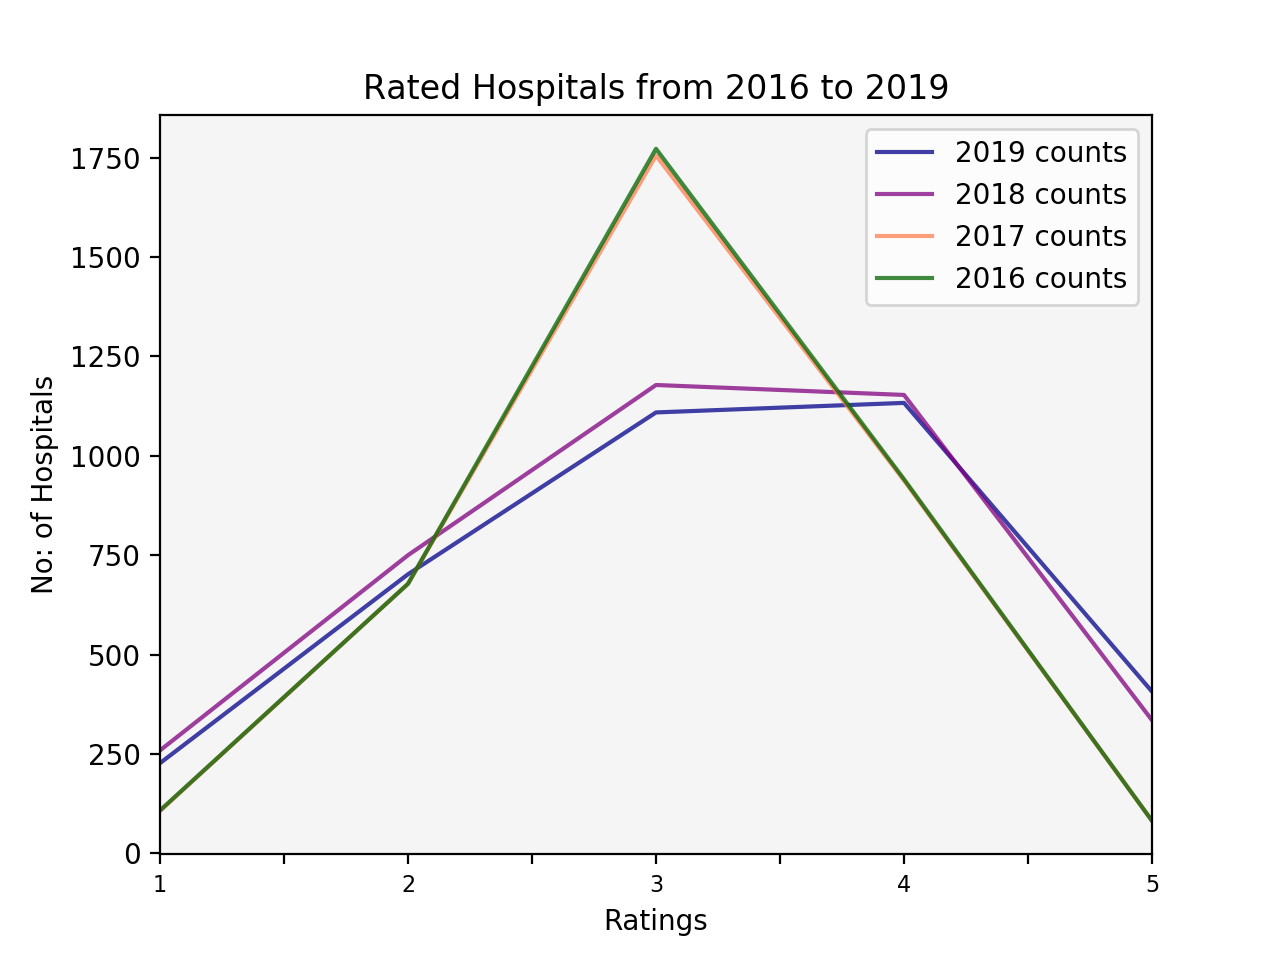

In [40]:
fig = ranking_df.plot(kind='line', color=["darkblue","purple","coral", "darkgreen"], alpha=0.75, rot=0)
plt.xticks(fontsize=8)
plt.ylabel("No: of Hospitals", fontsize=10)
plt.xlabel("Ratings", fontsize=10)
plt.savefig('output/2016-2019hospitalRatings.png')
plt.title("Rated Hospitals from 2016 to 2019")
fig.set_facecolor('whitesmoke')

In [41]:
#Getting the counts of each measure from individual parameters
seriesEFC2019 = pd.Series(pie2019['Effectiveness of care'])
EFC2019_above_counts = seriesEFC2019.str.count("Above the national average").sum()
EFC2019_below_counts = seriesEFC2019.str.count("Below the national average").sum()
EFC2019_same_counts = seriesEFC2019.str.count("Same as the national average").sum()

seriesTOC2019 = pd.Series(pie2019['Timeliness of care'])
TOC2019_above_counts = seriesTOC2019.str.count("Above the national average").sum()
TOC2019_below_counts = seriesTOC2019.str.count("Below the national average").sum()
TOC2019_same_counts = seriesTOC2019.str.count("Same as the national average").sum()

seriesEUMI2019 = pd.Series(pie2019['Efficient use of medical imaging'])
EUMI2019_above_counts = seriesEUMI2019.str.count("Above the national average").sum()
EUMI2019_below_counts = seriesEUMI2019.str.count("Below the national average").sum()
EUMI2019_same_counts = seriesEUMI2019.str.count("Same as the national average").sum()

seriesPE2019 = pd.Series(pie2019['Patient experience'])
PE2019_above_counts = seriesPE2019.str.count("Above the national average").sum()
PE2019_below_counts = seriesPE2019.str.count("Below the national average").sum()
PE2019_same_counts = seriesPE2019.str.count("Same as the national average").sum()

seriesR2019 = pd.Series(pie2019['Patient experience'])
R2019_above_counts = seriesR2019.str.count("Above the national average").sum()
R2019_below_counts = seriesR2019.str.count("Below the national average").sum()
R2019_same_counts = seriesR2019.str.count("Same as the national average").sum()

In [42]:
#Getting the counts of each measure from individual parameters
seriesEFC2018 = pd.Series(pie2018['Effectiveness of care'])
EFC2018_above_counts = seriesEFC2018.str.count("Above the national average").sum()
EFC2018_below_counts = seriesEFC2018.str.count("Below the national average").sum()
EFC2018_same_counts = seriesEFC2018.str.count("Same as the national average").sum()

seriesTOC2018 = pd.Series(pie2018['Timeliness of care'])
TOC2018_above_counts = seriesTOC2018.str.count("Above the national average").sum()
TOC2018_below_counts = seriesTOC2018.str.count("Below the national average").sum()
TOC2018_same_counts = seriesTOC2018.str.count("Same as the national average").sum()

seriesEUMI2018 = pd.Series(pie2018['Efficient use of medical imaging'])
EUMI2018_above_counts = seriesEUMI2018.str.count("Above the national average").sum()
EUMI2018_below_counts = seriesEUMI2018.str.count("Below the national average").sum()
EUMI2018_same_counts = seriesEUMI2018.str.count("Same as the national average").sum()

seriesPE2018 = pd.Series(pie2018['Patient experience'])
PE2018_above_counts = seriesPE2018.str.count("Above the national average").sum()
PE2018_below_counts = seriesPE2018.str.count("Below the national average").sum()
PE2018_same_counts = seriesPE2018.str.count("Same as the national average").sum()

seriesR2018 = pd.Series(pie2018['Patient experience'])
R2018_above_counts = seriesR2018.str.count("Above the national average").sum()
R2018_below_counts = seriesR2018.str.count("Below the national average").sum()
R2018_same_counts = seriesR2018.str.count("Same as the national average").sum()

In [61]:
#Getting the counts of each measure from individual parameters
seriesEFC2017 = pd.Series(pie2017['Effectiveness of care'])
EFC2017_above_counts = seriesEFC2017.str.count("Above the national average").sum()
EFC2017_below_counts = seriesEFC2017.str.count("Below the national average").sum()
EFC2017_same_counts = seriesEFC2017.str.count("Same as the national average").sum()

seriesTOC2017 = pd.Series(pie2017['Timeliness of care'])
TOC2017_above_counts = seriesTOC2017.str.count("Above the national average").sum()
TOC2017_below_counts = seriesTOC2017.str.count("Below the national average").sum()
TOC2017_same_counts = seriesTOC2017.str.count("Same as the national average").sum()

seriesEUMI2017 = pd.Series(pie2017['Efficient use of medical imaging'])
EUMI2017_above_counts = seriesEUMI2017.str.count("Above the national average").sum()
EUMI2017_below_counts = seriesEUMI2017.str.count("Below the national average").sum()
EUMI2017_same_counts = seriesEUMI2017.str.count("Same as the national average").sum()

seriesPE2017 = pd.Series(pie2017['Patient experience'])
PE2017_above_counts = seriesPE2017.str.count("Above the national average").sum()
PE2017_below_counts = seriesPE2017.str.count("Below the national average").sum()
PE2017_same_counts = seriesPE2017.str.count("Same as the national average").sum()

seriesR2017 = pd.Series(pie2017['Patient experience'])
R2017_above_counts = seriesR2017.str.count("Above the national average").sum()
R2017_below_counts = seriesR2017.str.count("Below the national average").sum()
R2017_same_counts = seriesR2017.str.count("Same as the national average").sum()


In [50]:
#Getting the counts of each measure from individual parameters
seriesEFC2016 = pd.Series(pie2016['Effectiveness of care'])
EFC2016_above_counts = seriesEFC2016.str.count("Above the National average").sum()
EFC2016_below_counts = seriesEFC2016.str.count("Below the National average").sum()
EFC2016_same_counts = seriesEFC2016.str.count("Same as the National average").sum()

seriesTOC2016 = pd.Series(pie2016['Timeliness of care'])
TOC2016_above_counts = seriesTOC2016.str.count("Above the National average").sum()
TOC2016_below_counts = seriesTOC2016.str.count("Below the National average").sum()
TOC2016_same_counts = seriesTOC2016.str.count("Same as the National average").sum()

seriesEUMI2016 = pd.Series(pie2016['Efficient use of medical imaging'])
EUMI2016_above_counts = seriesEUMI2016.str.count("Above the National average").sum()
EUMI2016_below_counts = seriesEUMI2016.str.count("Below the National average").sum()
EUMI2016_same_counts = seriesEUMI2016.str.count("Same as the National average").sum()

seriesPE2016 = pd.Series(pie2016['Patient experience'])
PE2016_above_counts = seriesPE2016.str.count("Above the National average").sum()
PE2016_below_counts = seriesPE2016.str.count("Below the National average").sum()
PE2016_same_counts = seriesPE2016.str.count("Same as the National average").sum()

seriesR2016 = pd.Series(pie2016['Patient experience'])
R2016_above_counts = seriesR2016.str.count("Above the National average").sum()
R2016_below_counts = seriesR2016.str.count("Below the National average").sum()
R2016_same_counts = seriesR2016.str.count("Same as the National average").sum()


In [63]:
#Creating a new dataframe of the counts
EFC_df=pd.DataFrame({"2016": [EFC2016_above_counts, EFC2016_below_counts, EFC2016_same_counts],
                     "2017": [EFC2017_above_counts, EFC2017_below_counts, EFC2017_same_counts],
                     "2018": [EFC2018_above_counts, EFC2018_below_counts, EFC2018_same_counts],
                    "2019": [EFC2019_above_counts, EFC2019_below_counts, EFC2019_same_counts]}, index=['Above the national average', 'Below the national average', 'Same as the national average'])

TOC_df=pd.DataFrame({"2016": [TOC2016_above_counts, TOC2016_below_counts, TOC2016_same_counts],
                     "2017": [TOC2017_above_counts, TOC2017_below_counts, TOC2017_same_counts],
                     "2018": [TOC2018_above_counts, TOC2018_below_counts, TOC2018_same_counts],
                     "2019": [TOC2019_above_counts, TOC2019_below_counts, TOC2019_same_counts]}, index=['Above the national average', 'Below the national average', 'Same as the national average'])

EUMI_df=pd.DataFrame({"2016": [EUMI2016_above_counts, EUMI2016_below_counts, EUMI2016_same_counts],
                      "2017": [EUMI2017_above_counts, EUMI2017_below_counts, EUMI2017_same_counts],
                      "2018": [EUMI2018_above_counts, EUMI2018_below_counts, EUMI2018_same_counts],
                      "2019": [EUMI2019_above_counts, EUMI2019_below_counts, EUMI2019_same_counts]}, index=['Above the national average', 'Below the national average', 'Same as the national average'])

PE_df=pd.DataFrame({"2016": [PE2016_above_counts, PE2016_below_counts, PE2016_same_counts],
                    "2017": [PE2017_above_counts, PE2017_below_counts, PE2017_same_counts],
                    "2018": [PE2018_above_counts, PE2018_below_counts, PE2018_same_counts],
                    "2019": [PE2019_above_counts, PE2019_below_counts, PE2019_same_counts]}, index=['Above the national average', 'Below the national average', 'Same as the national average'])

R_df=pd.DataFrame({"2016": [R2016_above_counts, R2016_below_counts, R2016_same_counts],
                   "2017": [R2017_above_counts, R2017_below_counts, R2017_same_counts],
                   "2018": [R2018_above_counts, R2018_below_counts, R2018_same_counts],
                   "2019": [R2019_above_counts, R2019_below_counts, R2019_same_counts]}, index=['Above the national average', 'Below the national average', 'Same as the national average'])

<IPython.core.display.Javascript object>


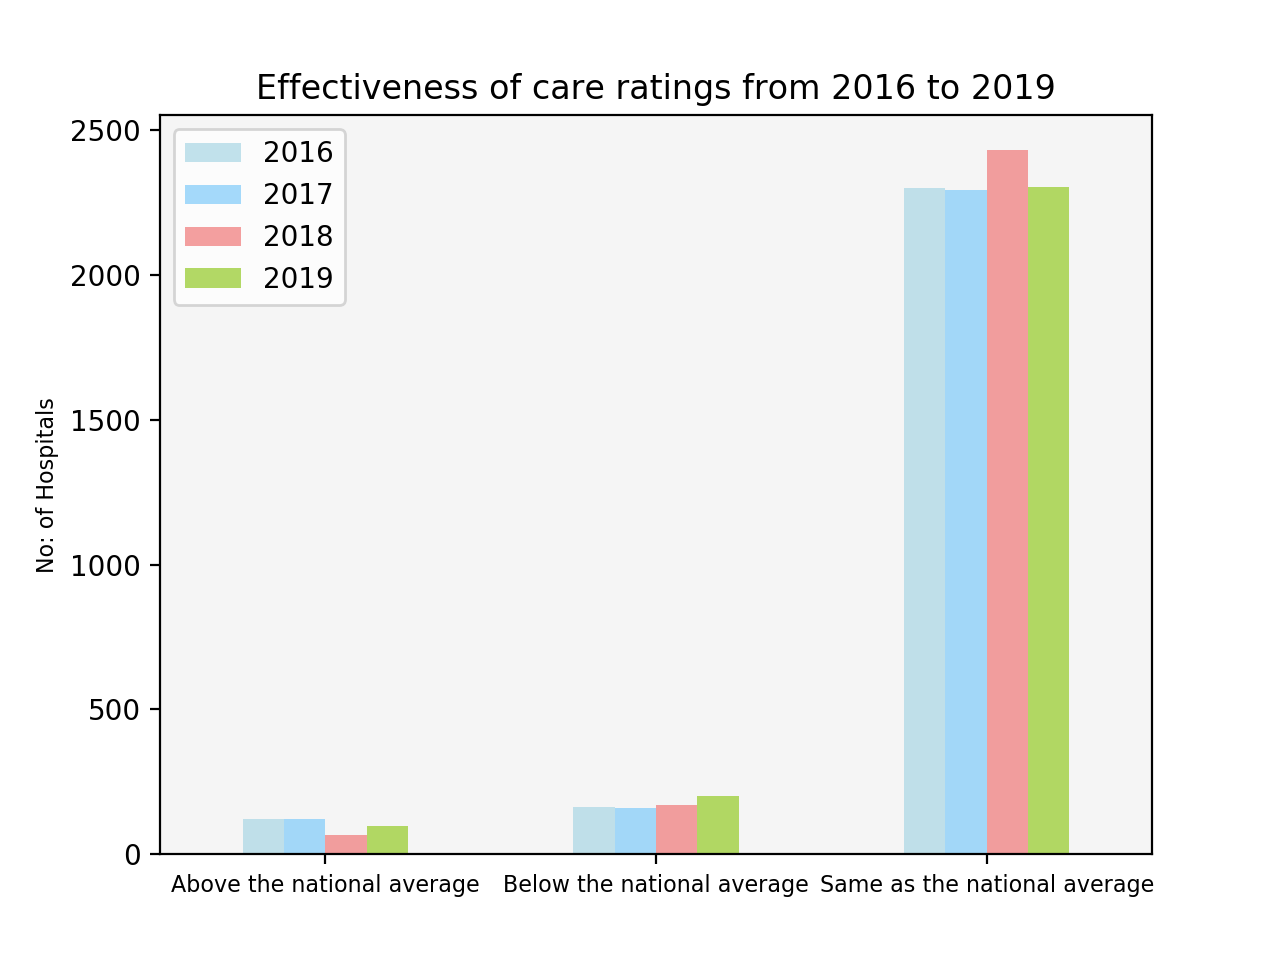

<IPython.core.display.Javascript object>


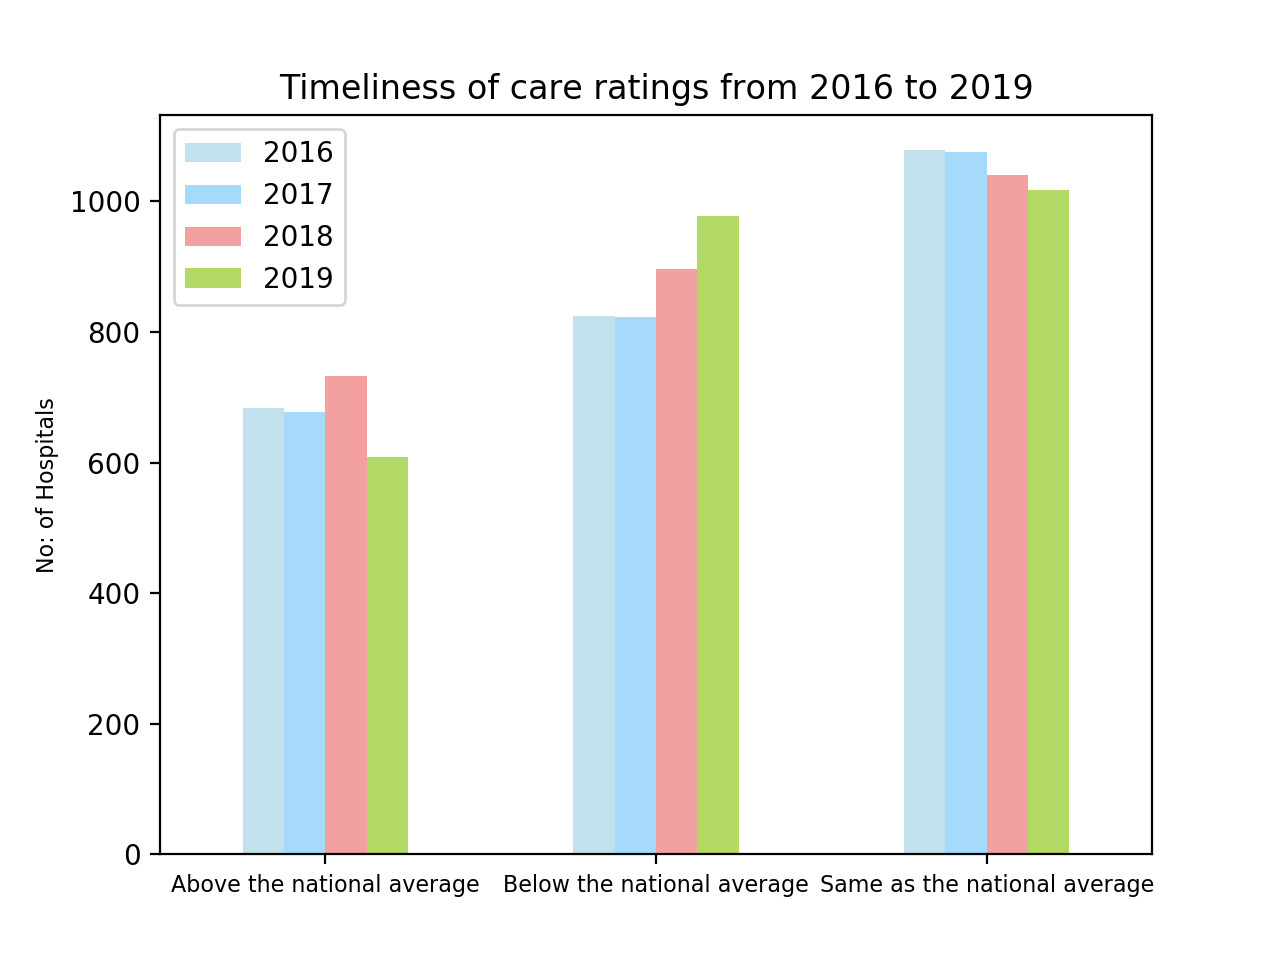

<IPython.core.display.Javascript object>


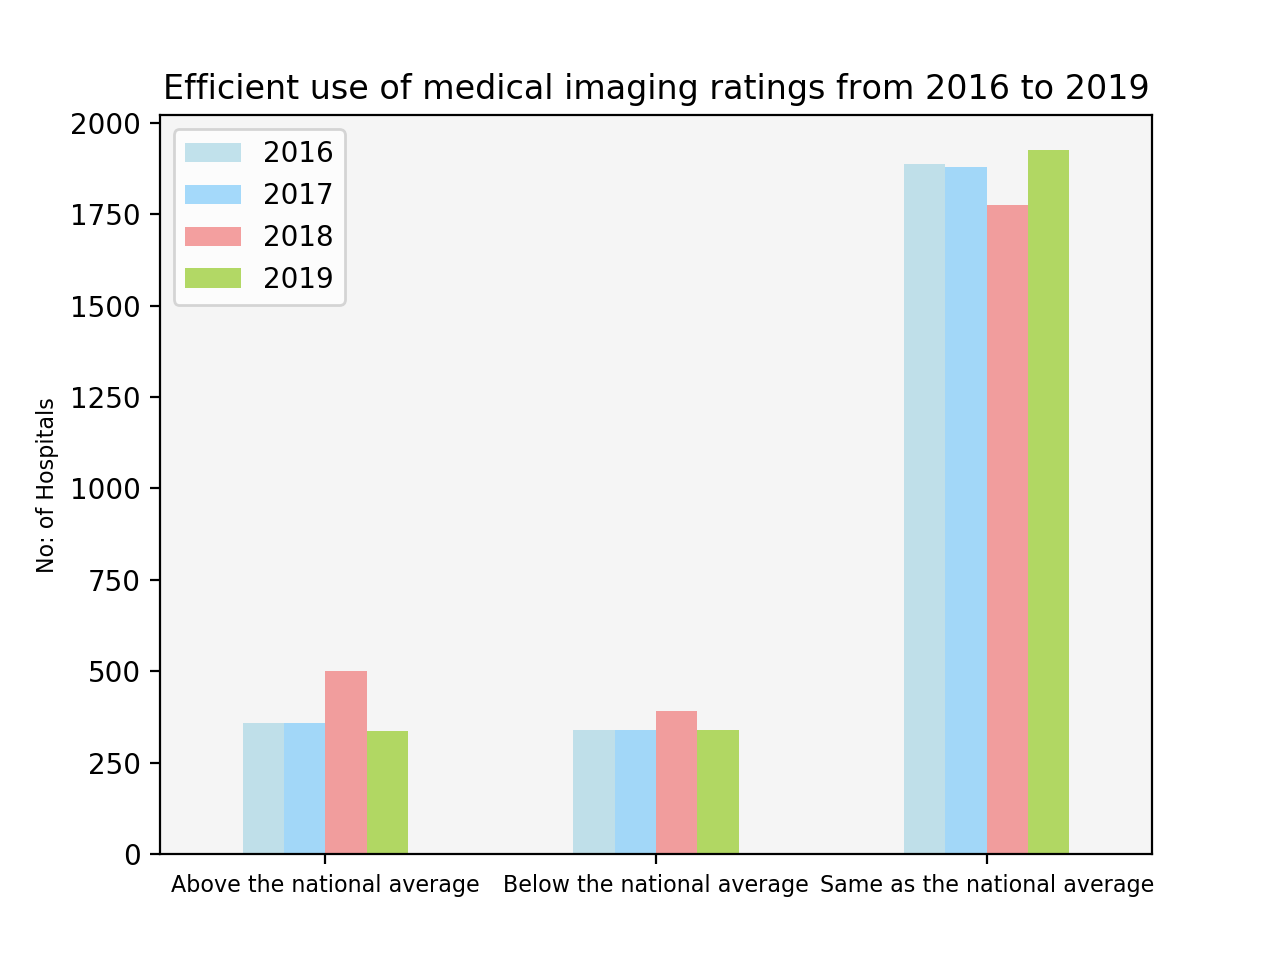

<IPython.core.display.Javascript object>


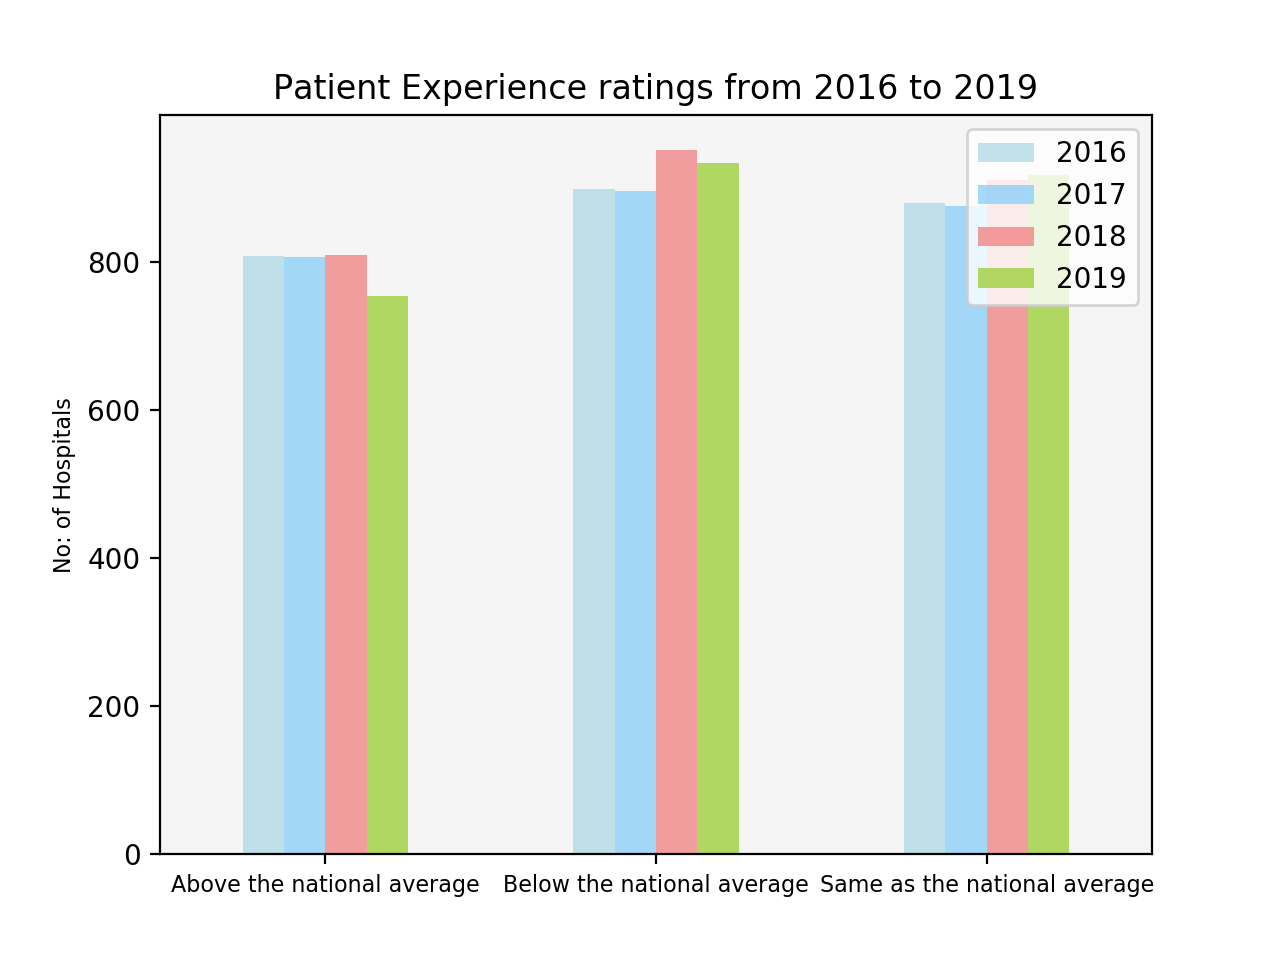

<IPython.core.display.Javascript object>


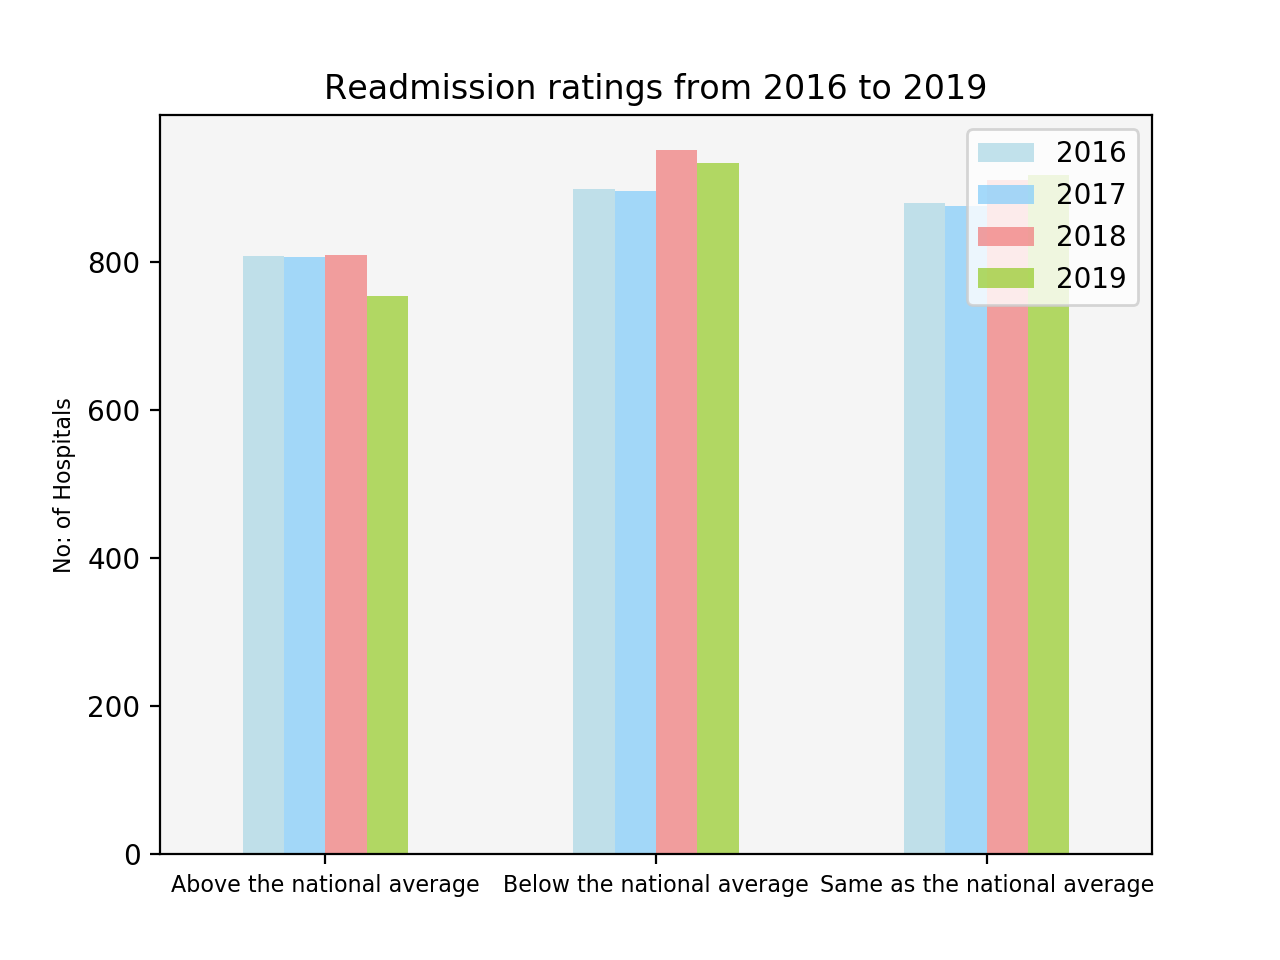

In [65]:
#Trends in hospitals "Effectiveness of care" from 2016 to 2019
fig1 = EFC_df.plot(kind='bar', color=["lightblue","lightskyblue","lightcoral", "yellowgreen"], alpha=0.75, rot=0)
plt.xticks(fontsize=8)
plt.ylabel("No: of Hospitals", fontsize=8)
plt.savefig('output/Effectiveness-of-care.png')
plt.title("Effectiveness of care ratings from 2016 to 2019")
fig1.set_facecolor('whitesmoke')


#Trends in hospitals "Timeliness of care " from 2016 to 2019
fig2 = TOC_df.plot(kind='bar', color=["lightblue","lightskyblue","lightcoral", "yellowgreen"], alpha=0.75, rot=0)
plt.xticks(fontsize=8)
plt.ylabel("No: of Hospitals", fontsize=8)
plt.savefig('output/Timeliness-of-care.png')
plt.title("Timeliness of care ratings from 2016 to 2019")
fig1.set_facecolor('whitesmoke')

#Trends in hospitals "Efficient use of medical imaging" from 2016 to 2019
fig3 = EUMI_df.plot(kind='bar', color=["lightblue","lightskyblue","lightcoral", "yellowgreen"], alpha=0.75, rot=0)
plt.xticks(fontsize=8)
plt.ylabel("No: of Hospitals", fontsize=8)
plt.savefig('output/Efficient-use-of-medical-imaging.png')
plt.title("Efficient use of medical imaging ratings from 2016 to 2019")
fig3.set_facecolor('whitesmoke')

#Trends in hospitals "Patient experience" from 2016 to 2019
fig4 = PE_df.plot(kind='bar', color=["lightblue","lightskyblue","lightcoral", "yellowgreen"], alpha=0.75, rot=0)
plt.xticks(fontsize=8)
plt.ylabel("No: of Hospitals", fontsize=8)
plt.savefig('output/Patient-experience.png')
plt.title("Patient Experience ratings from 2016 to 2019")
fig4.set_facecolor('whitesmoke')

#Trends in hospitals "Readmission" from 2016 to 2019
fig5 = R_df.plot(kind='bar', color=["lightblue","lightskyblue","lightcoral", "yellowgreen"], alpha=0.75, rot=0)
plt.xticks(fontsize=8)
plt.ylabel("No: of Hospitals", fontsize=8)
plt.savefig('output/Readmission.png')
plt.title("Readmission ratings from 2016 to 2019")
fig5.set_facecolor('whitesmoke')
